In [1]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [26]:
def RK4step(lamd,told, uold, h): # Denna klassen skrivs just nu där f = skalär*y. 
    Y1 = lamd*uold    #Y1 definieras som f(uold,told).
    Y2 = lamd*(uold + h*Y1/2)
    Y3 = lamd*(uold + h*Y2/2)
    Y4 = lamd*(uold + h*Y3)
    unew = uold + (h/6)*(Y1 + 2*Y2 + 2*Y3 + Y4)

    return unew

def RK4Int(lamd, y0,t0,tf,N):
    h = (tf-t0)/N

    Y = np.zeros((N, 2)) #En matris med vilket steg vi är på samt vilken tid som det motsvarar. 
    Y[0,0] = y0
    Y[0,1] = t0

    for i in range(N-1):
         x = RK4step(lamd, Y[i,1], Y[i,0], h)
         Y[i+1, 0] = x
         Y[i+1, 1] = Y[i,1] + h

    correct = np.zeros_like(Y)
    error = np.zeros_like(Y)
    for i in range(N):
        correct[i,0] = np.exp(lamd*Y[i,1])*y0

    error[:,0] = abs(Y[:,0]-correct[:,0])
    error[:,1] = Y[:,1]

    return Y, error, correct

In [73]:
def errVSh(A, y0, t0, tf):
    Nvec = [int(np.power(2,i)) for i in range(3, 10)]
    err = np.zeros(len(Nvec))
    for i in range(len(Nvec)):
        Y,error, correct = RK4Int(A, y0, t0, tf, Nvec[i])
        err[i] = error[-1, 0]

    h=np.zeros(len(Nvec))
    for i in range(len(Nvec)):
        h[i] = (tf - t0) /Nvec[i]
    plt.grid()
    plt.xlabel("Steglängden h")
    plt.ylabel("Felet på uppskattningen")
    plt.title("Felet som funktion av steglängden i loglog-skala")
    plt.loglog(h, err, 'r')

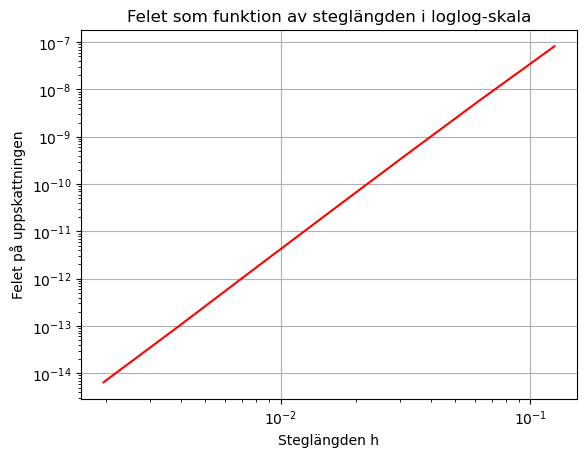

In [76]:
lamd = 0.5 
y0 = 1
t0 = 0 
tf = 1
errVSh(lamd,y0,t0,tf) #Väldigt linjärt och fint för denna tidsskalan. 

 # Kontroll så att koden fungerar 


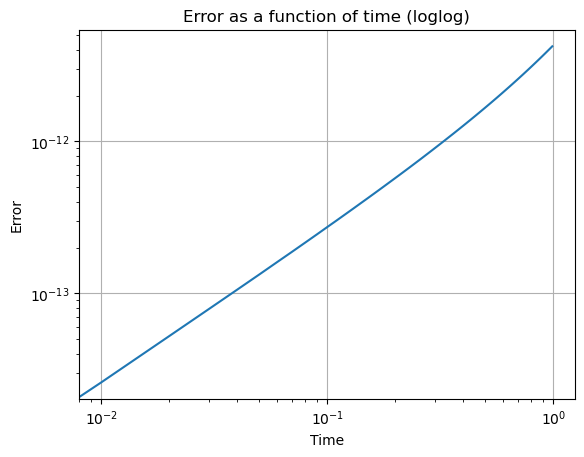

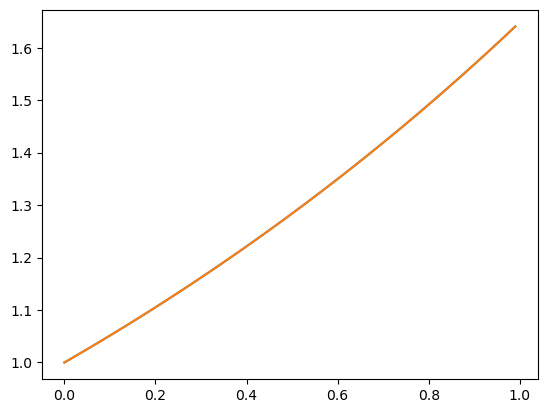

In [72]:
lamd = 0.5
y0 = 1
t0 = 0 
tf = 1
N = 100

plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Error as a function of time (loglog)")
plt.grid()
Y, error, correct = RK4Int(lamd, y0, t0, tf, N)

plt.loglog(error[:,1], error[:,0])
plt.show()
plt.plot(Y[:,1], Y[:,0])
plt.plot(Y[:,1],correct[:,0])


In [3]:
def RK34step(f, told, Yold, h):
    Y1 = f(told, Yold)
    Y2 = f(told + h/2, Yold + h/2*Y1)
    Y3 = f(told + h/2, Yold + h/2*Y2)
    Z3 = f(told + h, Yold - h*Y1 + 2*h*Y2)
    Y4 = f(told + h, Yold + h*Y3)
    Ynew = Yold + h/6*(Y1 + 2*Y2 + 2*Y3 + Y4)

    err = np.abs(h/6*(2*Y2+Z3-2*Y3-Y4))

    return Ynew, err

def newstep (tol, err, errold, hold, k):
    hnew = hold * np.power(tol/err, 2/(3*k))*np.power(tol/errold, -1/(3*k))
    return hnew
    
def adaptiveRK34(f, t0, tf, y0, tol):
    k = 4
    h = (tf-t0)*np.power(tol,1/4)/(100*(1+la.norm(f(t0,y0))))
    t = [t0]
    Y = [y0]
    ERR = [0]
    y, err = RK34step(f, t[-1], y0, h)
    Y.append(y)
    ERR.append(err)
    h = newstep(tol, ERR[-1], tol, h, k)
    t.append(t[-1] + h)

    while t[-1] + h < tf:
        y, err = RK34step(f, t[-1], Y[-1], h)
        Y.append(y)
        ERR.append(err)
        h = newstep(tol, ERR[-1], ERR[-2], h, k)
        t.append(t[-1] + h)

    y, err = RK34step(f, t[-1], Y[-1], tf-t[-1])
    t.append(tf)
    Y.append(y)
    ERR.append(err)
    return t, Y, ERR


In [4]:
def lotka(t,u):
    a = 3
    b = 9
    c = 15
    d = 15
    return a*u(1)-b*u(1)*u(2), c*u(1)*u(2)-d*u(2)

Antal steg:  67


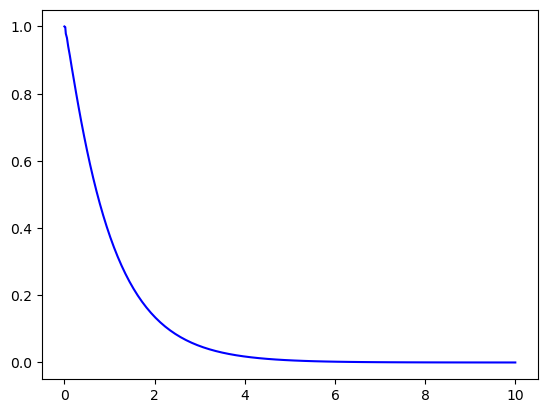

In [5]:
y0 = 1
f = lambda t, y: -1.05*y
t, Y, ERR = adaptiveRK34(f, 0, 10, y0, 1e-6)
plt.plot(t, Y, 'b')
print("Antal steg: ", len(t))
